In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

plt.style.use("tableau-colorblind10")

F_SHOW = False


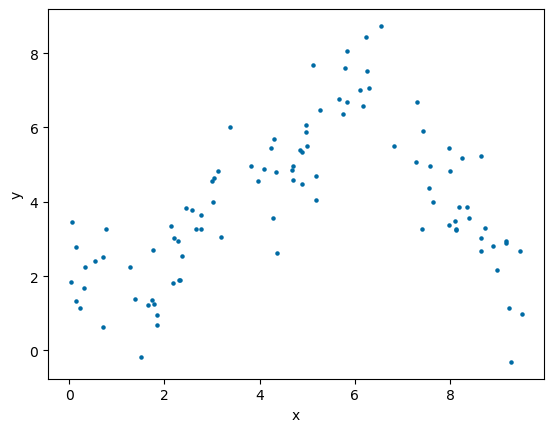

In [2]:
N = 100
rng = np.random.default_rng(123)

x = rng.uniform(0, 10, size=N)


def f(x):
    return 1 + np.cos(x * 2) + x * np.sin(x / 3)


eps = rng.normal(loc=0, scale=1.0, size=N)
y = f(x) + eps

x_line = np.linspace(x.min(), x.max())
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
    plt.legend()
plt.scatter(x, y, s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [3]:
df = pd.DataFrame.from_dict({"y": y, "x": x})
df.to_csv("toy_data.csv", index=False)


# OLS

In [4]:
ols = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     11.45
Date:                Fri, 28 Apr 2023   Prob (F-statistic):            0.00103
Time:                        11:10:17   Log-Likelihood:                -204.47
No. Observations:                 100   AIC:                             412.9
Df Residuals:                      98   BIC:                             418.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8534      0.372      7.663      0.000       2.114       3.592
x1             0.2264      0.067      3.385      0.001       0.094       0.359
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   2.303
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.113
Skew:                           0.057   Prob(JB):                        0.945
Kurtosis:                       2.881   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

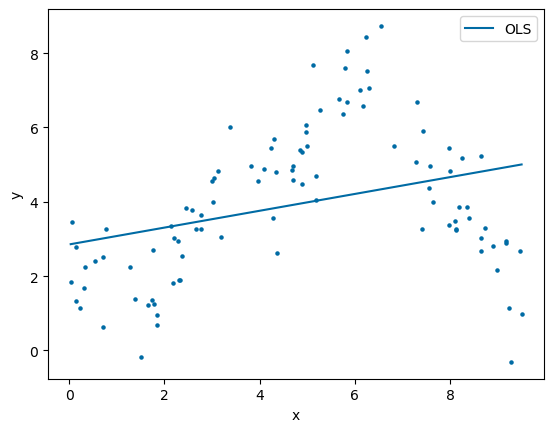

In [5]:
x_line = np.linspace(x.min(), x.max())

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(x_line, ols.predict(sm.add_constant(x_line)), label="OLS")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# 区分多項式基底関数

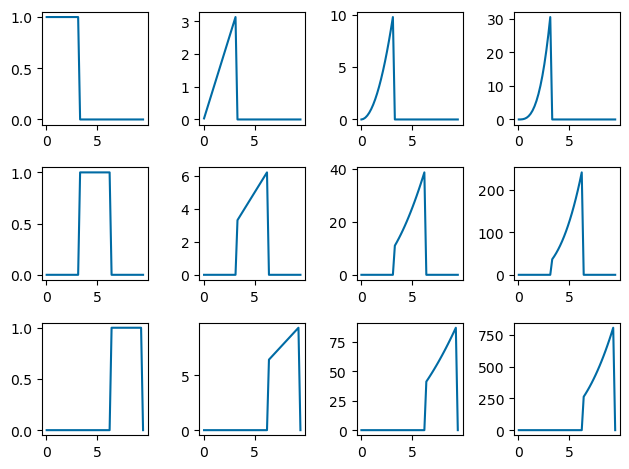

In [6]:
def StepBasis(x, n=10, xmin=x.min(), xmax=x.max(), with_end=True):
    knots = np.linspace(xmin, xmax, num=n + 1, endpoint=True)
    mask1 = x[:, None] < np.append(knots, np.inf)[None]
    mask2 = np.append(-np.inf, knots)[None] <= x[:, None]
    phi = (mask1 * mask2).astype(float)

    if with_end:
        return phi
    else:
        return phi[:, 1:-1]


def PolyBasis(x, p=5):
    pwr = np.arange(p + 1)
    return x[:, None] ** pwr[None]


def SegPolyBasis(x, n=3, p=3, xmin=x.min(), xmax=x.max(), with_end=False):
    phi_s = StepBasis(x, n, xmin, xmax, with_end)
    phi_p = PolyBasis(x, p)

    phi = phi_s[:, :, None] * phi_p[:, None, :]

    return phi.reshape(len(x), -1)


x_line = np.linspace(x.min(), x.max())
phi_line = SegPolyBasis(x_line, n=3, p=3)
for p in range(phi_line.shape[1]):
    plt.subplot(3, 4, p + 1)
    plt.plot(x_line, phi_line[:, p])
    # plt.legend()
plt.tight_layout()
plt.show()


In [7]:
n = 3  # number of segments
p = 3  # polynomial order

phi = SegPolyBasis(x, n=n, p=p)
ols_poly = sm.OLS(endog=y, exog=phi).fit()
ols_poly.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              185.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                    5.10e-57
Time:                        11:10:19   Log-Likelihood:                         -126.71
No. Observations:                 100   AIC:                                      277.4
Df Residuals:                      88   BIC:                                      308.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5361      0.498      5.091      0.000       1.546       3.526
x2            -1.9733      1.610     -1.226      0.224      -5.173       1.226
x3             0.9165      1.181      0.776      0.440      -1.430       3.263
x4            -0.0299      0.236     -0.126      0.900      -0.500       0.440
x5            84.8683     36.443      2.329      0.022      12.446     157.291
x6           -49.2282     22.956     -2.144      0.035     -94.849      -3.608
x7             9.7681      4.748      2.057      0.043       0.332      19.204
x8            -0.6198      0.322     -1.923      0.058      -1.260       0.021
x9           343.4917    175.256      1.960      0.053      -4.793     691.777
x10         -123.1387     66.194     -1.860      0.066    -254.686       8.408
x11           15.0095      8.288      1.811      0.074      -1.460      31.479
x12           -0.6150      0.344     -1.788      0.077      -1.299       0.069
==============================================================================
Omnibus:                        0.271   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.413
Skew:                          -0.105   Prob(JB):                        0.813
Kurtosis:                       2.765   Cond. No.                     6.60e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

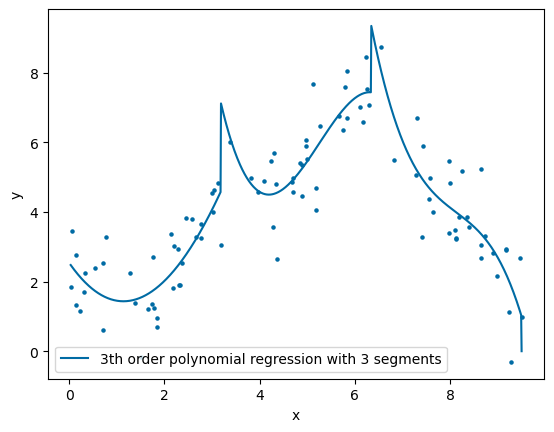

In [8]:
x_line = np.linspace(x.min(), x.max(), num=1000)
phi_line = SegPolyBasis(x_line, n=n, p=p)

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(
    x_line,
    ols_poly.predict(phi_line),
    label="{}th order polynomial regression with {} segments".format(p, n),
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# 3次スプライン

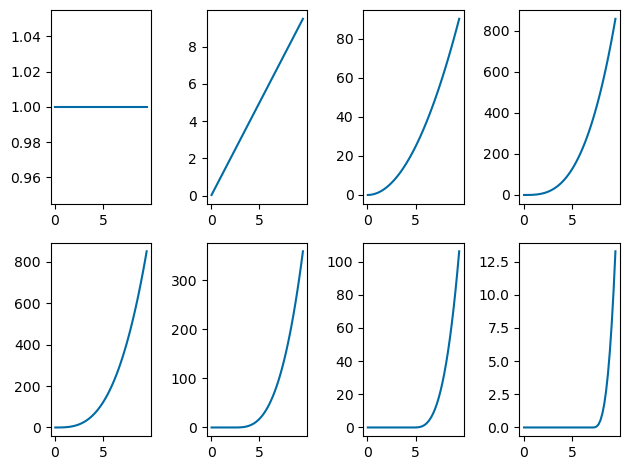

In [9]:
def CubicSplineBasis(x, n=3, xmin=x.min(), xmax=x.max()):
    knots = np.linspace(xmin, xmax, num=n - 1, endpoint=False)
    phi = PolyBasis(x, p=3)

    tps3 = x[:, None] - knots[None]
    tps3 = np.where(tps3 > 0, tps3, 0) ** 3

    phi = np.concatenate([phi, tps3], axis=1)
    return phi


x_line = np.linspace(x.min(), x.max())
phi_line = CubicSplineBasis(x_line, n=5)
for p in range(phi_line.shape[1]):
    plt.subplot(2, 4, p + 1)
    plt.plot(x_line, phi_line[:, p])
    # plt.legend()
plt.tight_layout()
plt.show()


In [10]:
phi = CubicSplineBasis(x, n=10)
ols_seg = sm.OLS(endog=y, exog=phi).fit()
ols_seg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     34.46
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           3.16e-27
Time:                        11:10:24   Log-Likelihood:                -126.53
No. Observations:                 100   AIC:                             277.1
Df Residuals:                      88   BIC:                             308.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1180      0.673      3.146      0.002       0.780       3.456
x1             0.7982      4.092      0.195      0.846      -7.334       8.930
x2            -2.2088      5.772     -0.383      0.703     -13.679       9.261
x3             0.3705      0.891      0.416      0.679      -1.401       2.142
x4             0.5836      1.449      0.403      0.688      -2.296       3.464
x5            -0.6259      3.210     -0.195      0.846      -7.005       5.753
x6            -1.7752      1.620     -1.096      0.276      -4.994       1.444
x7             2.7945      1.267      2.206      0.030       0.277       5.312
x8            -1.6690      1.176     -1.419      0.159      -4.006       0.668
x9            -0.9492      1.177     -0.807      0.422      -3.288       1.389
x10            3.0831      1.186      2.601      0.011       0.727       5.439
x11           -3.1148      1.386     -2.247      0.027      -5.869      -0.360
x12            2.5252      2.808      0.899      0.371      -3.056       8.106
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.333
Skew:                          -0.003   Prob(JB):                        0.847
Kurtosis:                       2.717   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

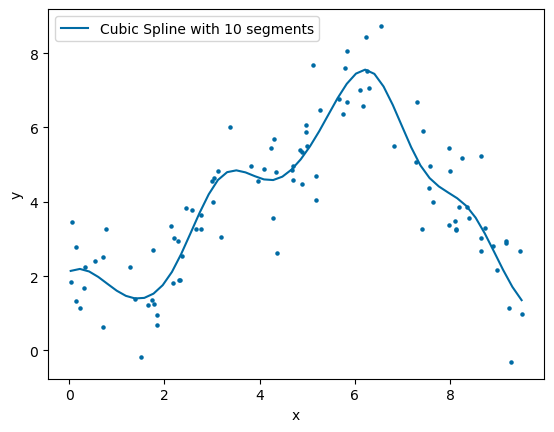

In [11]:
x_line = np.linspace(x.min(), x.max())
n = phi.shape[1] - 4 + 1
phi_line = CubicSplineBasis(x_line, n=n)

plt.scatter(x, y, s=5)
if F_SHOW:
    plt.plot(x_line, f(x_line), c="k", ls="--", label="f(x)")
plt.plot(
    x_line,
    ols_seg.predict(phi_line),
    label="Cubic Spline with {} segments".format(n),
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
